In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as AG

In [2]:
crime = pd.read_csv ('crime_data.csv')

In [3]:
crime .head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
crime_df = crime.drop (['Place'],axis =1)

In [6]:
# Def # Normalization Function
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
crime_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
# Normalized data frame(Considering the numerical part of data)
df_norm = norm_func (crime_df.iloc [:,0:])

In [9]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


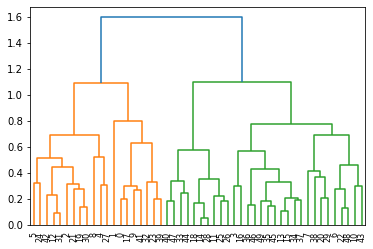

In [10]:
# Create Dendrogram
dendrogram = sch.dendrogram (sch.linkage(df_norm, method = 'complete'))

In [11]:
# Create Cluster
hc = AG(n_clusters = 2, affinity = 'euclidean', linkage = 'single')

In [12]:
# Save clusters for chat 
y_hc = hc.fit_predict(df_norm)
clusters = pd.DataFrame (y_hc,columns=['clusters'] )

In [13]:
df_norm['h_clusters'] = hc.labels_

In [14]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,1
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [15]:
df_norm.groupby('h_clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
h_clusters,,,,
0,0.418244,0.424238,0.574542,0.34773
1,0.554217,0.746575,0.271186,0.96124


In [16]:
df_norm.groupby('h_clusters').agg('count')

,Murder,Assault,UrbanPop,Rape
h_clusters,,,,
0,49,49,49,49
1,1,1,1,1


## K-Means clusters

In [19]:
from sklearn.cluster import KMeans

In [21]:
crime.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [23]:
crime_k=crime.copy()

In [24]:
crime_k.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [28]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_crime_k = scaler.fit_transform (crime_k.iloc[:,1:])
Scaled_crime_k

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

C:\Users\Ismahil\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


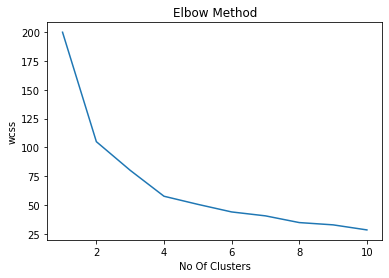

In [38]:
wcss = []
for i in range (1,11):
        kmean = KMeans(n_clusters = i, random_state = 0)
        kmean.fit(Scaled_crime_k)
        wcss.append(kmean.inertia_)
        
plt.plot (range(1,11),wcss)
plt.title ('Elbow Method')
plt.xlabel ('No Of Clusters')
plt.ylabel ('wcss')
plt.show()

In [85]:
#Building the model
crime_new = KMeans(3, random_state = 0)
crime_new.fit(Scaled_crime_k)

KMeans(n_clusters=3, random_state=0)

In [86]:
crime_new.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [87]:
crime_k ['new_clusters'] = crime_new.labels_
crime_k

,Place,Murder,Assault,UrbanPop,Rape,new_clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [88]:
crime_k.groupby('new_clusters').agg('mean')

,Murder,Assault,UrbanPop,Rape
new_clusters,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


In [89]:
crime_k.groupby('new_clusters').agg('count')

,Place,Murder,Assault,UrbanPop,Rape
new_clusters,,,,,
0,13,13,13,13,13
1,19,19,19,19,19
2,18,18,18,18,18
